## Introduction & Business Problem :

## Problem Background:

The restaurant industry in London is growing exponentially, every street is filled with every variety of restaurant, fast food place and pub; every type of food is available from classic European cuisines, primarily Italian, Spanish and French, to more exotic foods originating from Asia or South America. Demand, in the culinary industry, has become extremely high and as a result so has extent of competition to open a restaurant or cafeteria in a supposedly ‘cool’ area of the city.

So it become harder to choose location of new restaurn today espashily in big city like London

## Problem

Pizza industry has grown up a lot in the last few years because the love of this dish along different people,
so this industry is not only about food but also about the place of restauran because if you failed at your first branch 
you probably not going to success in the industry

So, the main purpose of the problem is to suggest a borough for a customer who want to open a pizza restaurant in london

## Success Criteria:

The success criteria of the project will be a good recommendation of borough/Neighborhood choice to The customer Ltd based on Lack of such restaurants in that location

## Data:

City will be analysed for the project is: Londaon

We will be using the below datasets for analysing London:

### Data 1:

Neighborhood has a total of 32 boroughs. In order to segement the boroughs and explore them, we will essentially need a dataset that contains the 32 boroughs and the latitude and logitude coordinates of each borough.

This dataset exists for free on the web. Link to the dataset is : https://en.wikipedia.org/wiki/List_of_London_boroughs

### Data 2:

London geographical coordinates data will be utilized as input for the Foursquare API, that will be leveraged to provision venues information for each borough. We will use the Foursquare API to explore pizza restaurants in London.

## Import Libraries

In [3]:
import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium # map rendering library
import folium # map rendering library
from folium import plugins
# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
# import k-means from clustering stage
from sklearn.cluster import KMeans
print('Libraries imported.')

Libraries imported.


## Load Data from Wikipidia

In [66]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_London_boroughs')[0]
df.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


## Clean Data and remove unwanted columns

In [67]:
# remove unwanted columns
df.drop(['Inner', 'Status', 'Local authority', 'Political control', 'Headquarters', 'Area (sq mi)', 'Nr. in map'], axis=1, inplace=True)
df.head(2)

,Borough,Population (2013 est)[1],Co-ordinates
0,Barking and Dagenham [note 1],194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E
1,Barnet,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W


In [68]:
# rename population column
df.rename(columns={"Population (2013 est)[1]" : "Population"}, inplace=True)

In [69]:
# split coordinates in latitude and longitude
df[['First','Last']] = df['Co-ordinates'].str.split("/",expand=True,)
df.head()

,Borough,Population,Co-ordinates,First,Last
0,Barking and Dagenham [note 1],194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,51°33′39″N 0°09′21″E﻿,﻿51.5607°N 0.1557°E
1,Barnet,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,51°37′31″N 0°09′06″W﻿,﻿51.6252°N 0.1517°W
2,Bexley,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,51°27′18″N 0°09′02″E﻿,﻿51.4549°N 0.1505°E
3,Brent,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,51°33′32″N 0°16′54″W﻿,﻿51.5588°N 0.2817°W
4,Bromley,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,51°24′14″N 0°01′11″E﻿,﻿51.4039°N 0.0198°E


In [70]:
# drop unwanted columns
df.drop(['Co-ordinates','First'],axis=1,inplace=True)
df.head()

,Borough,Population,Last
0,Barking and Dagenham [note 1],194352,﻿51.5607°N 0.1557°E
1,Barnet,369088,﻿51.6252°N 0.1517°W
2,Bexley,236687,﻿51.4549°N 0.1505°E
3,Brent,317264,﻿51.5588°N 0.2817°W
4,Bromley,317899,﻿51.4039°N 0.0198°E


In [71]:
# split coordinates into latitude and longitude
df[['Latitude','Longitude']] = df['Last'].str.split("N",expand=True,)  
df['Latitude'] = df['Latitude'].str[:-1]
df['Longitude'] = df['Longitude'].str[:-2]
df.head()

,Borough,Population,Last,Latitude,Longitude
0,Barking and Dagenham [note 1],194352,﻿51.5607°N 0.1557°E,﻿51.5607,0.1557
1,Barnet,369088,﻿51.6252°N 0.1517°W,﻿51.6252,0.1517
2,Bexley,236687,﻿51.4549°N 0.1505°E,﻿51.4549,0.1505
3,Brent,317264,﻿51.5588°N 0.2817°W,﻿51.5588,0.2817
4,Bromley,317899,﻿51.4039°N 0.0198°E,﻿51.4039,0.0198


In [72]:
# remove unwanted column
df.drop(["Last"], axis=1, inplace=True)
df.head()

,Borough,Population,Latitude,Longitude
0,Barking and Dagenham [note 1],194352,﻿51.5607,0.1557
1,Barnet,369088,﻿51.6252,0.1517
2,Bexley,236687,﻿51.4549,0.1505
3,Brent,317264,﻿51.5588,0.2817
4,Bromley,317899,﻿51.4039,0.0198


In [73]:
# handle borough names with [note ..]
df['Borough'] = df['Borough'].replace('Barking and Dagenham [note 1]', 'Barking and Dagenham')
df['Borough'] = df['Borough'].replace('Greenwich [note 2]', 'Greenwich')
df['Borough'] = df['Borough'].replace('Hammersmith and Fulham [note 4]', 'Hammersmith and Fulham')
df.head()

,Borough,Population,Latitude,Longitude
0,Barking and Dagenham,194352,﻿51.5607,0.1557
1,Barnet,369088,﻿51.6252,0.1517
2,Bexley,236687,﻿51.4549,0.1505
3,Brent,317264,﻿51.5588,0.2817
4,Bromley,317899,﻿51.4039,0.0198


In [74]:
# check data types of df
df.dtypes

Borough       object
Population     int64
Latitude      object
Longitude     object
dtype: object

In [75]:
# check if there are any character in the latitude
for lat in range(len(df['Latitude'])):
    df.loc[lat, 'Latitude'] = ''.join(ch for ch in df.loc[lat, 'Latitude'] if ch.isdigit() or ch == '.')

# change data types of latitude and longitude to float
df = df.astype({'Latitude': 'float','Longitude':'float'})
df.dtypes

Borough        object
Population      int64
Latitude      float64
Longitude     float64
dtype: object

## Show the final Dataframe

In [76]:
df

,Borough,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,0.2817
4,Bromley,317899,51.4039,0.0198
5,Camden,229719,51.5290,0.1255
6,Croydon,372752,51.3714,0.0977
7,Ealing,342494,51.5130,0.3089
8,Enfield,320524,51.6538,0.0799
9,Greenwich,264008,51.4892,0.0648


   ## Use geopy to get coordinates of London

In [77]:
address = 'London'

geolocator = Nominatim(user_agent="london_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


## Create a map of London with Populataion superimposed on top

In [78]:
# create map object using coordinates of london
map_london = folium.Map(location=[latitude, longitude], zoom_start=9)

# add markers to map
for lat, lng, borough, population in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Population']):
    label = '{}, {}'.format(population, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)
    
map_london

## Define Foursquare Credentials and Version

In [79]:
CLIENT_ID = 'NE4Q4G1XUSVVI0MWFQCJOENARJX0SFHTBHD3WCRJEVF3IG43' # your Foursquare ID
CLIENT_SECRET = 'YJE50LKGFPBIRF0CNJVAOIGV4YULI5SC33WTHAYANMDQXGTR' # your Foursquare Secret
VERSION = '20200717' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NE4Q4G1XUSVVI0MWFQCJOENARJX0SFHTBHD3WCRJEVF3IG43
CLIENT_SECRET:YJE50LKGFPBIRF0CNJVAOIGV4YULI5SC33WTHAYANMDQXGTR


## Define function to get Pizza restaurants in location with radius 2000 meters

In [80]:
def get_pizza(dataframe):
    latitudes = dataframe['Latitude']
    longitudes = dataframe['Longitude']
    boroughs = dataframe['Borough']
    populations = dataframe['Population']
    query = 'Pizza'
    radius = 2000
    
    venues_list = []
    
    for lat, lng, borough, population in zip(latitudes, longitudes, boroughs, populations):
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&query={}'.format(
        CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, radius, query)
        
        results = requests.get(url).json()
        print(results)
        pizzas = results['response']['venues']
        
        # return only relevant information for each nearby venue
        if len(pizzas) != 0:
            venues_list.append([(
                borough, 
                population,
                lat, 
                lng, 
                v['name'], 
                v['location']['lat'], 
                v['location']['lng']) for v in pizzas])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough',
                    'Borough Population',
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude']
    
    return(nearby_venues)

In [81]:
df2 = get_pizza(df)

{'meta': {'code': 200, 'requestId': '5f11d6d779fcaa78937baedc'}, 'response': {'venues': [{'id': '5c2f67e91acf11002be6f2d1', 'name': 'Pizza Hut Delivery', 'location': {'address': '339 Valence Avenue', 'lat': 51.55908765185484, 'lng': 0.13031458774526072, 'labeledLatLngs': [{'label': 'display', 'lat': 51.55908765185484, 'lng': 0.13031458774526072}], 'distance': 1765, 'postalCode': 'RM8 3RA', 'cc': 'GB', 'city': 'Essex', 'state': 'Essex', 'country': 'United Kingdom', 'formattedAddress': ['339 Valence Avenue', 'Essex', 'RM8 3RA', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1595005082', 'hasPerk': False}, {'id': '4b65ba21f964a52011fc2ae3', 'name': 'Pizza Hut', 'location': {'address': '36 London Road', 'lat': 51.57592887721421, 'lng': 0.17643078529908962, 'labeledLat

{'meta': {'code': 200, 'requestId': '5f11d611669071485a0e8b95'}, 'response': {'venues': [{'id': '5c2f67ea2be425002c24caff', 'name': 'Pizza Hut Delivery', 'location': {'address': '3 Chase Cross Road', 'lat': 51.59972603581063, 'lng': 0.1638984585115395, 'labeledLatLngs': [{'label': 'display', 'lat': 51.59972603581063, 'lng': 0.1638984585115395}], 'distance': 2958, 'postalCode': 'RM5 3PJ', 'cc': 'GB', 'city': 'Essex', 'state': 'Essex', 'country': 'United Kingdom', 'formattedAddress': ['3 Chase Cross Road', 'Essex', 'RM5 3PJ', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1595005082', 'hasPerk': False}]}}
{'meta': {'code': 200, 'requestId': '5f11d8938b53332abd7bf9e3'}, 'response': {'venues': [{'id': '4b9fd1faf964a520a04137e3', 'name': 'Pizza Express', 'location': {'

{'meta': {'code': 200, 'requestId': '5f11d81544d64a5afb9ba413'}, 'response': {'venues': [{'id': '4bd1c8e3046076b061727271', 'name': "Domino's Pizza", 'location': {'address': '228 High Street', 'lat': 51.406327108814295, 'lng': 0.012874603271484375, 'labeledLatLngs': [{'label': 'display', 'lat': 51.406327108814295, 'lng': 0.012874603271484375}], 'distance': 551, 'postalCode': 'BR1 1PQ', 'cc': 'GB', 'city': 'Kent', 'state': 'Kent', 'country': 'United Kingdom', 'formattedAddress': ['228 High Street', 'Kent', 'BR1 1PQ', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1595005084', 'hasPerk': False}, {'id': '4baf9bb6f964a5207d0f3ce3', 'name': 'Pizza Hut Delivery', 'location': {'address': '22 Homesdale Road', 'lat': 51.39653247000894, 'lng': 0.02865543890288791, 'labeledL

{'meta': {'code': 200, 'requestId': '5f11d7d1ea795307abcc55bd'}, 'response': {'venues': [{'id': '4bd1f6469854d13a7ca1fa4d', 'name': "Domino's Pizza", 'location': {'address': '296 High Street', 'lat': 51.37461444132215, 'lng': 0.0982773178318439, 'labeledLatLngs': [{'label': 'display', 'lat': 51.37461444132215, 'lng': 0.0982773178318439}], 'distance': 360, 'postalCode': 'BR6 0NF', 'cc': 'GB', 'city': 'Kent', 'state': 'Kent', 'country': 'United Kingdom', 'formattedAddress': ['296 High Street', 'Kent', 'BR6 0NF', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1595005085', 'hasPerk': False}, {'id': '4cc2d0f89141370469dfb655', 'name': 'Pizza Express', 'location': {'address': '97 High Street', 'lat': 51.37917952948439, 'lng': 0.1025958748340372, 'labeledLatLngs': [{'lab

{'meta': {'code': 200, 'requestId': '5f11d7b8007e716904e0b80d'}, 'response': {'venues': [{'id': '5e72809a5f3cdf0007a42071', 'name': "Domino's Pizza - London - Woolwich", 'location': {'address': '9-11 Old Stable Row, Woolwich', 'lat': 51.4891038, 'lng': 0.0665171, 'labeledLatLngs': [{'label': 'display', 'lat': 51.4891038, 'lng': 0.0665171}], 'distance': 119, 'postalCode': 'SE18 6JR', 'cc': 'GB', 'city': 'London', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['9-11 Old Stable Row, Woolwich', 'London', 'Greater London', 'SE18 6JR', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1595005086', 'hasPerk': False}, {'id': '57698391498ecd44c376c71c', 'name': 'Pizza Hut Delivery', 'location': {'address': '39-41 The Village', 'lat': 51.482146040

{'meta': {'code': 200, 'requestId': '5f11d7b9007e716904e0b9a2'}, 'response': {'venues': [{'id': '5c2f67e25ba046002cdc93e9', 'name': 'Pizza Hut Delivery', 'location': {'address': '393 Barking Road, East Ham', 'lat': 51.53329677259373, 'lng': 0.0550784972386964, 'labeledLatLngs': [{'label': 'display', 'lat': 51.53329677259373, 'lng': 0.0550784972386964}], 'distance': 1302, 'postalCode': 'E6 2JT', 'cc': 'GB', 'city': 'London', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['393 Barking Road, East Ham', 'London', 'Greater London', 'E6 2JT', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1595005086', 'hasPerk': False}, {'id': '4bd212c4b221c9b620dcd6d0', 'name': "Domino's Pizza", 'location': {'address': '136 Barking Road, East Ham', 'lat': 

{'meta': {'code': 200, 'requestId': '5f11d6789abab31a2362cf57'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '5f11d750008756568590e691'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '5f11d8259503fd4cb439a475'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '5f11d8dabd9c5b4d000b8e39'}, 'response': {'venues': [{'id': '4b65ba21f964a52011fc2ae3', 'name': 'Pizza Hut', 'location': {'address': '36 London Road', 'lat': 51.57592887721421, 'lng': 0.17643078529908962, 'labeledLatLngs': [{'label': 'display', 'lat': 51.57592887721421, 'lng': 0.17643078529908962}], 'distance': 772, 'postalCode': 'RM7 9RB', 'cc': 'GB', 'city': 'Essex', 'state': 'Essex', 'country': 'United Kingdom', 'formattedAddress': ['36 London Road', 'Essex', 'RM7 9RB', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/foo

{'meta': {'code': 200, 'requestId': '5f11d87d0af06e78b9683697'}, 'response': {'venues': [{'id': '4ee266b6b634bfdd0d3499dc', 'name': 'Farm Pizza', 'location': {'address': '467 Clayhill Road', 'lat': 51.566216073052566, 'lng': 0.48386239898884603, 'labeledLatLngs': [{'label': 'display', 'lat': 51.566216073052566, 'lng': 0.48386239898884603}], 'distance': 2521, 'cc': 'GB', 'city': 'Basildon', 'state': 'Essex', 'country': 'United Kingdom', 'formattedAddress': ['467 Clayhill Road', 'Basildon', 'Essex', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1595005088', 'hasPerk': False}]}}
{'meta': {'code': 200, 'requestId': '5f11d617669071485a0ea093'}, 'response': {'venues': [{'id': '5d79f975572feb00083dc4f3', 'name': "Pick 'N' Mix Pizza", 'location': {'address': '123 Grove R

{'meta': {'code': 200, 'requestId': '5f11d7bc007e716904e0c4ac'}, 'response': {'venues': [{'id': '4f513c6ee4b023845d1ba9c3', 'name': 'Rainham Pizza & Kebab', 'location': {'address': '121 Wennington Road', 'lat': 51.516784, 'lng': 0.195304, 'labeledLatLngs': [{'label': 'display', 'lat': 51.516784, 'lng': 0.195304}], 'distance': 1646, 'cc': 'GB', 'city': 'Essex', 'state': 'Essex', 'country': 'United Kingdom', 'formattedAddress': ['121 Wennington Road', 'Essex', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1595005089', 'hasPerk': False}, {'id': '4d90f14e5091a1cdd174c601', 'name': 'Pizza Hut', 'location': {'address': '47 Upminster Road South, Rainham', 'lat': 51.518632983899685, 'lng': 0.192238600349242, 'labeledLatLngs': [{'label': 'display', 'lat': 51.5186329838996

{'meta': {'code': 200, 'requestId': '5f11d8b0b2f69d1e8b5f4fa2'}, 'response': {'venues': [{'id': '4bacb808f964a5208a063be3', 'name': 'Pizza Hut Delivery', 'location': {'address': '115 Burnt Ash Road', 'lat': 51.451015236034046, 'lng': 0.01267301502969076, 'labeledLatLngs': [{'label': 'display', 'lat': 51.451015236034046, 'lng': 0.01267301502969076}], 'distance': 863, 'postalCode': 'SE12 8RA', 'cc': 'GB', 'city': 'London', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['115 Burnt Ash Road', 'London', 'Greater London', 'SE12 8RA', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1595005091', 'hasPerk': False}, {'id': '5b2d45a4610f04002c25f1be', 'name': "Domino's Pizza", 'location': {'address': '252 Hither Green Lane', 'lat': 51.44793795810

{'meta': {'code': 200, 'requestId': '5f11d95ba536c57dc68e59d3'}, 'response': {'venues': [{'id': '4db1ea3b1e729fcc565d7db9', 'name': 'Pizza Hut', 'location': {'address': 'High Rd.', 'lat': 51.55961860649539, 'lng': 0.07651698242493968, 'labeledLatLngs': [{'label': 'display', 'lat': 51.55961860649539, 'lng': 0.07651698242493968}], 'distance': 180, 'postalCode': 'IG', 'cc': 'GB', 'city': 'Ilford', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['High Rd.', 'Ilford', 'Greater London', 'IG', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1595005092', 'hasPerk': False}, {'id': '50573310e4b021c8a9413f9b', 'name': 'The Perfect Pizza Company', 'location': {'address': 'Exchange (Ilford)', 'lat': 51.56021737731424, 'lng': 0.07195078197518412, 'la

{'meta': {'code': 200, 'requestId': '5f11d87472fc2b16d17682df'}, 'response': {'venues': [{'id': '5c9b386dd1a402002cdc3a98', 'name': "Domino's Pizza", 'location': {'address': '39 The Hill, Northfleet', 'lat': 51.443145711448146, 'lng': 0.3366149560563372, 'labeledLatLngs': [{'label': 'display', 'lat': 51.443145711448146, 'lng': 0.3366149560563372}], 'distance': 906, 'postalCode': 'DA11 9EX', 'cc': 'GB', 'city': 'Gravesend', 'state': 'Kent', 'country': 'United Kingdom', 'formattedAddress': ['39 The Hill, Northfleet', 'Gravesend', 'Kent', 'DA11 9EX', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1595005092', 'hasPerk': False}, {'id': '4b76e0adf964a52076662ee3', 'name': 'Pizza Hut', 'location': {'address': 'Gravesend Imperial Retail Park, Thames Way', 'crossStreet': 

{'meta': {'code': 200, 'requestId': '5f11d6be417c2434e479b324'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '5f11d878b03989534b348e47'}, 'response': {'venues': [{'id': '5cdfff2016fa04002cab4a4b', 'name': "Domino's Pizza", 'location': {'address': 'Unit H Rathbone Market, Canning Town', 'lat': 51.5162438, 'lng': 0.010631, 'labeledLatLngs': [{'label': 'display', 'lat': 51.5162438, 'lng': 0.010631}], 'distance': 778, 'postalCode': 'E16 1EH', 'cc': 'GB', 'neighborhood': 'Newham', 'city': 'London', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['Unit H Rathbone Market, Canning Town', 'London', 'Greater London', 'E16 1EH', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1595005094', 'hasPerk': False}, {'id': '4c547eb81b46

{'meta': {'code': 200, 'requestId': '5f11d84ae2168a4ac40a7737'}, 'response': {'venues': [{'id': '4c539199b3b09c746aa815b4', 'name': 'Pizza Hut', 'location': {'address': '25 Electric Parade, South Woodford', 'crossStreet': 'George Lane', 'lat': 51.594935990926544, 'lng': 0.023997428241727903, 'labeledLatLngs': [{'label': 'display', 'lat': 51.594935990926544, 'lng': 0.023997428241727903}], 'distance': 865, 'postalCode': 'E18 2LY', 'cc': 'GB', 'city': 'Church End', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['25 Electric Parade, South Woodford (George Lane)', 'Church End', 'Greater London', 'E18 2LY', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1595005094', 'hasPerk': False}, {'id': '58da8b9cd0bb3e5af73590ff', 'name': "Domino's Piz

{'meta': {'code': 200, 'requestId': '5f11d81b0b1123164878e4e4'}, 'response': {'venues': [{'id': '5c2f67e8475abd00390c2d16', 'name': 'Pizza Hut Delivery', 'location': {'address': '5 Joyce Dawson Way, Thamesmead', 'lat': 51.5066957, 'lng': 0.1063207, 'labeledLatLngs': [{'label': 'display', 'lat': 51.5066957, 'lng': 0.1063207}], 'distance': 2381, 'postalCode': 'SE28 8RA', 'cc': 'GB', 'city': 'London', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['5 Joyce Dawson Way, Thamesmead', 'London', 'Greater London', 'SE28 8RA', 'United Kingdom']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1595005095', 'hasPerk': False}, {'id': '5154aef0e4b0859c9dd7bd0f', 'name': "Papa John's Pizza", 'location': {'address': '21 Picardy Street', 'lat': 51.49154868801873, 'lng': 

## Let's check the size of the resulting dataframe

In [82]:
print(df2.shape)
df2.head()

(225, 7)


,Borough,Borough Population,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude
0,Barking and Dagenham,194352,51.5607,0.1557,Pizza Hut Delivery,51.559088,0.130315
1,Barking and Dagenham,194352,51.5607,0.1557,Pizza Hut,51.575929,0.176431
2,Barking and Dagenham,194352,51.5607,0.1557,Domino's Pizza,51.572155,0.137951
3,Barking and Dagenham,194352,51.5607,0.1557,Pizza Hut,51.568381,0.185108
4,Barking and Dagenham,194352,51.5607,0.1557,chicken n pizza centre,51.560452,0.136862


### Check Number of pizza restaurants for each Borough

In [83]:
df2.groupby('Borough').count()

,Borough Population,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude
Borough,,,,,,
Barking and Dagenham,12,12,12,12,12,12
Barnet,1,1,1,1,1,1
Bexley,9,9,9,9,9,9
Brent,5,5,5,5,5,5
Bromley,10,10,10,10,10,10
Camden,5,5,5,5,5,5
Croydon,8,8,8,8,8,8
Ealing,2,2,2,2,2,2
Enfield,5,5,5,5,5,5


## Make new Dataframe contain info about pizza res in Boroughs

In [84]:
# get number of res in each borough
df_pizza = df2.groupby('Borough').count()
# drop unwanted columns
df_pizza = df_pizza.drop(['Borough Population', 'Borough Latitude', 'Borough Longitude', 'Venue Latitude', 'Venue Longitude'], axis=1)
# get population for each Borough
df_pizza = pd.merge(df_pizza, df, on='Borough')
df_pizza.drop(['Latitude', 'Longitude'], axis=1, inplace=True)
# show the dataframe
df_pizza.head()

,Borough,Venue,Population
0,Barking and Dagenham,12,194352
1,Barnet,1,369088
2,Bexley,9,236687
3,Brent,5,317264
4,Bromley,10,317899


## Analyze each Borough

Now we will make a new indicator for how good or bad each location
this indicator will name:
### Population/res

In [85]:
# dfine new column for population per res
df_pizza['Pop/res'] = df_pizza['Population'] / df_pizza['Venue']
# remove decimels from number
df_pizza['Pop/res'] = df_pizza['Pop/res'].astype(int)
df_pizza.head()

,Borough,Venue,Population,Pop/res
0,Barking and Dagenham,12,194352,16196
1,Barnet,1,369088,369088
2,Bexley,9,236687,26298
3,Brent,5,317264,63452
4,Bromley,10,317899,31789


## Pop/res indicator

This indicator basicly show how many people in average go to each restauran in the Borough
### High Pop/res: indicates that this borough has low number of restaurants for the population in borough
### Low Pop/res: indicates that this borough has high number of restaurants for the population in borough

### so, The high the Pop/res the more this borough is good market for starting a new pizza restaurant

## Visualizing

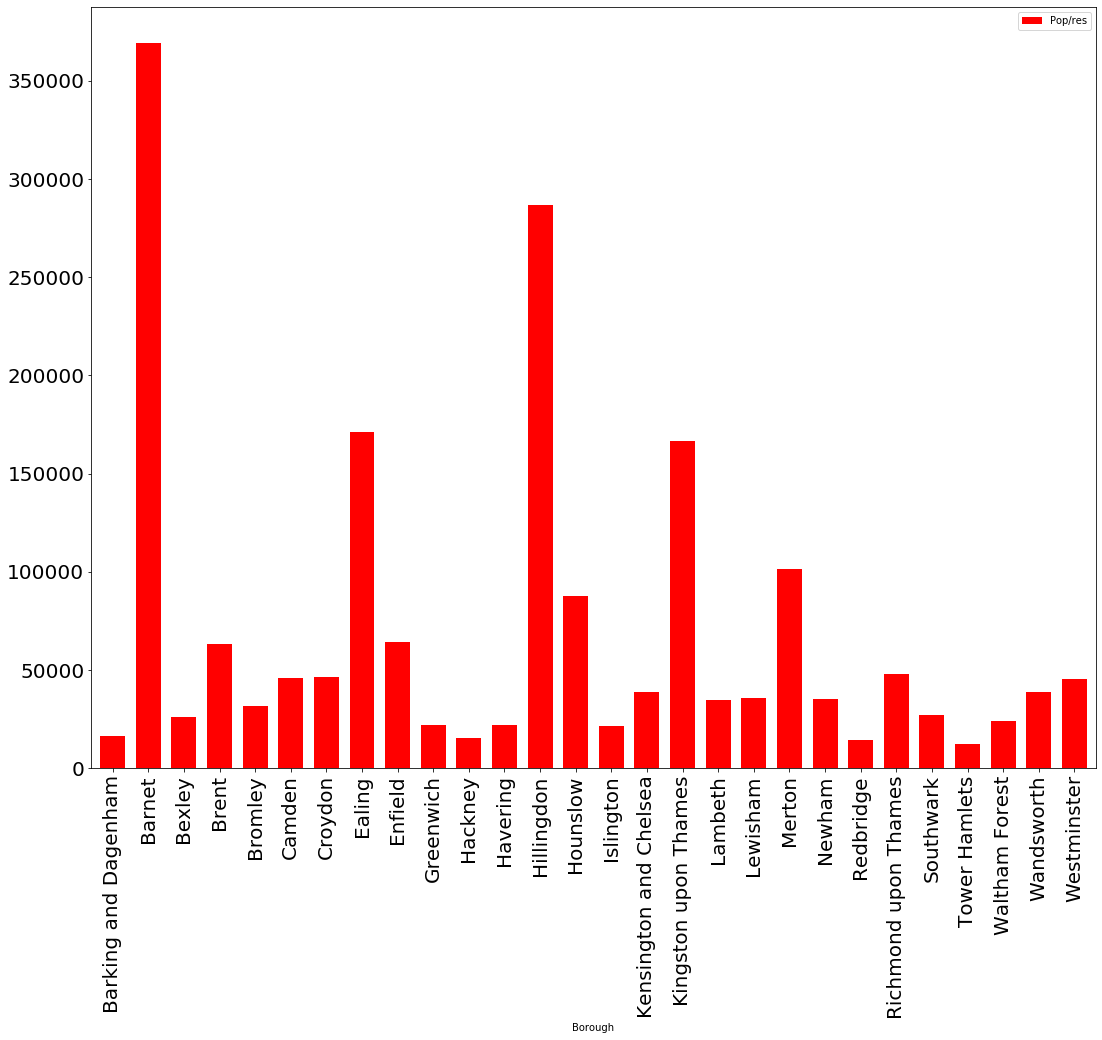

<Figure size 432x288 with 0 Axes>

In [86]:
# make a bar plot to visualize each pop/res for each bourough
df_pizza.plot(kind='bar', x='Borough', y='Pop/res', figsize=(18,14), fontsize=20, color='red', width=.7)
plt.show()
plt.savefig('Population per res.jpeg')

The above chart indicates that 'Barnet' has the best market to start new pizza restaurant as it have little number of restaurants to the population

## So the answer of our question is that 'Bernet' is the best place in new york to start pizza res

# Now let's try to answer another question 
## What is the best places if we wanted open branches in the future


## We will use k-means clustering to answer this question

## Pre-processing

Make dataframe for saving boroughs names to delete it from df_pizza

In [87]:
# new df contains population and Borough names
df_population = df_pizza[['Borough', 'Population']]
df_population.head()

,Borough,Population
0,Barking and Dagenham,194352
1,Barnet,369088
2,Bexley,236687
3,Brent,317264
4,Bromley,317899


As you can see borough column is not very good data to be applicaple for k-means clustering so let's drop it

In [88]:
df_pizza.drop(['Borough'], axis=1, inplace=True)
df_pizza.head()

,Venue,Population,Pop/res
0,12,194352,16196
1,1,369088,369088
2,9,236687,26298
3,5,317264,63452
4,10,317899,31789


## Modeling

Let's run our model and group our boroughs into two clusters.

In [89]:
# number of clusters 
num_clusters = 2

# train the model 12 times and print labels list 
k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(df_pizza)
labels = k_means.labels_

print(labels)

[0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Insights

Note that each row in our dataset represents a borough, and therefore, each row is assigned a label.

In [90]:
df_pizza["Labels"] = labels
df_pizza.head(5)

,Venue,Population,Pop/res,Labels
0,12,194352,16196,0
1,1,369088,369088,1
2,9,236687,26298,0
3,5,317264,63452,0
4,10,317899,31789,0


Check the centroid values by averaging the features in each cluster

In [91]:
df_pizza.groupby('Labels').mean()

,Venue,Population,Pop/res
Labels,,,
0,8.840000,261165.68,43441.600000
1,1.333333,332796.00,275713.666667


Now we can define each group into some conclusion
### 0: Low pop/res and a lot of restaurants so it has very high competaion so it is not recommanded
### 1: Low pop/res and low number of restaurants so it has low competaion so it is recommanded for future branches 

## Knowing the name of each labeled borough

In [92]:
df_pizza = pd.merge(df_pizza, df_population, on='Population')
df_pizza.head()

,Venue,Population,Pop/res,Labels,Borough
0,12,194352,16196,0,Barking and Dagenham
1,1,369088,369088,1,Barnet
2,9,236687,26298,0,Bexley
3,5,317264,63452,0,Brent
4,10,317899,31789,0,Bromley


In [93]:
#get boroughs where label == 1
df_recommended = df_pizza[(df_pizza['Labels'] == 1)]
df_recommended

,Venue,Population,Pop/res,Labels,Borough
1,1,369088,369088,1,Barnet
7,2,342494,171247,1,Ealing
12,1,286806,286806,1,Hillingdon


### So the answer of 2nd question is : 'Barnet', 'Ealing', and 'Hillingdon' is the best for starting new branches

# Visualiz the place of branches

## Coordinates for each borough

In [94]:
df_recommended =  pd.merge(df_recommended, df, on='Population')
df_recommended.drop('Borough_y', inplace=True, axis=1)
df_recommended


,Venue,Population,Pop/res,Labels,Borough_x,Latitude,Longitude
0,1,369088,369088,1,Barnet,51.6252,0.1517
1,2,342494,171247,1,Ealing,51.5130,0.3089
2,1,286806,286806,1,Hillingdon,51.5441,0.4760


### Map for branches

In [95]:
# create map object 
branches_map = folium.Map(location =[latitude, longitude], zoom_start=9)

# add markers to places
for lat, lng , borough, pop in zip(df_recommended['Latitude'], df_recommended['Longitude'], df_recommended['Borough_x'], df_recommended['Pop/res']):
    label = 'The branch of {} has Population/restauren of: {}'.format(borough, pop)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(branches_map)

branches_map